# Cross-Country Comparison — Solar Data (Benin, Sierra Leone, Togo)

This notebook reviews processed solar data sets from the three nations, aiming to spotlight the optimal location for harnessing solar power.
Core irradiation measures (GHI, DNI, DHI) will be compared via overview stats, visual box plots, and analytical tests to reveal key disparities among the locales.

# 1, Imports & display settings

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# 2, Load Cleaned Data

In [20]:

benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierra_leone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

# Add country labels
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all into one DataFrame
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

df_all.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country,hour,month,date
0,2021-08-09 00:01:00,474.2,345.7,213.4,0.0,0.0,26.2,93.4,0.0,0.4,...,0.0,998,0,0.0,26.3,26.2,Benin,NaN,NaN,NaN
1,2021-08-09 00:02:00,474.2,345.7,213.4,0.0,0.0,26.2,93.6,0.0,0.0,...,0.0,998,0,0.0,26.3,26.2,Benin,NaN,NaN,NaN
2,2021-08-09 00:03:00,474.2,345.7,213.4,0.0,0.0,26.2,93.7,0.3,1.1,...,1.5,997,0,0.0,26.4,26.2,Benin,NaN,NaN,NaN
3,2021-08-09 00:04:00,474.2,345.7,213.4,0.0,0.0,26.2,93.3,0.2,0.7,...,1.3,997,0,0.0,26.4,26.3,Benin,NaN,NaN,NaN
4,2021-08-09 00:05:00,474.2,345.7,213.4,0.0,0.0,26.2,93.3,0.1,0.7,...,1.0,997,0,0.0,26.4,26.3,Benin,NaN,NaN,NaN


# 3, Summary Statistics

In [21]:
metrics = ['GHI', 'DNI', 'DHI']
summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         475.62  474.2  228.25  349.32  345.7  193.07  222.32  213.4   
Sierra Leone  380.87  359.5  213.17  173.15  115.3  191.08  228.49  225.0   
Togo          442.22  430.3  227.53  150.70    0.0  250.16  116.42    2.5   

                      
                 std  
Country               
Benin         107.44  
Sierra Leone  104.62  
Togo          156.50

# 4, Boxplots per Metric

/var/folders/ft/7mbclcqn3mx1qw0smc3vmr0r0000gn/T/ipykernel_6931/168373777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
/var/folders/ft/7mbclcqn3mx1qw0smc3vmr0r0000gn/T/ipykernel_6931/168373777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
/var/folders/ft/7mbclcqn3mx1qw0smc3vmr0r0000gn/T/ipykernel_6931/168373777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


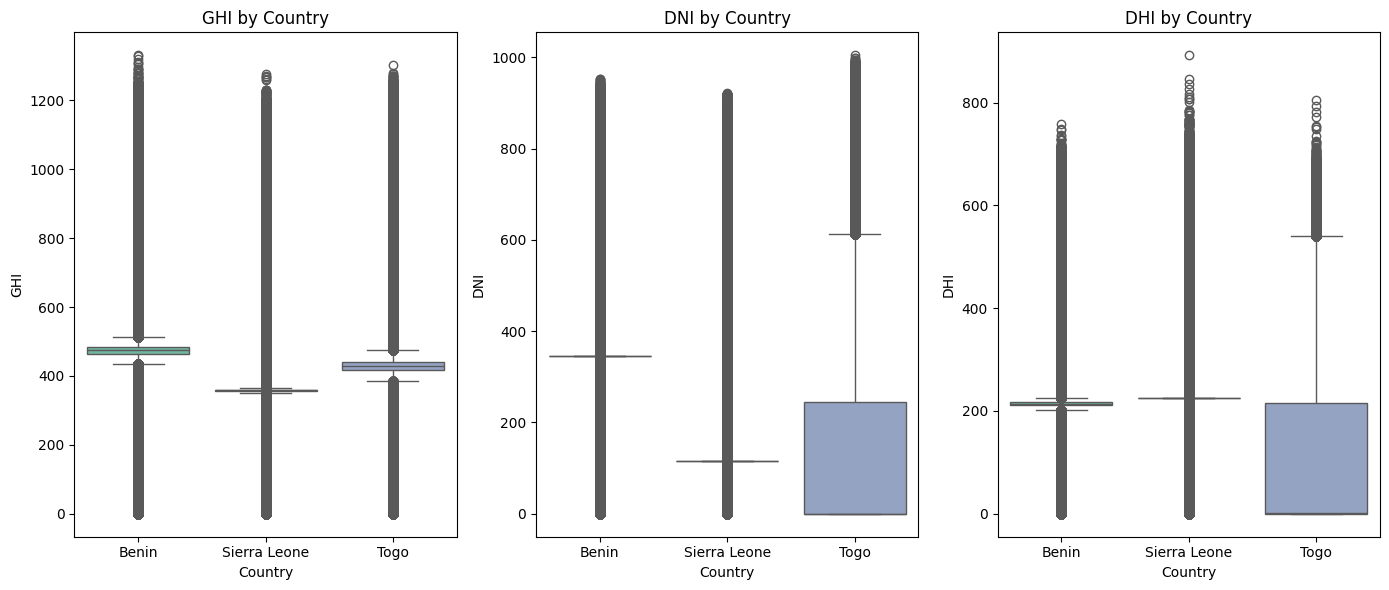

In [22]:
plt.figure(figsize=(14,6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} by Country')
plt.tight_layout()
plt.show()


# 5, Statistical Testing (ANOVA / Kruskal–Wallis)

In [23]:
# One-way ANOVA for GHI
f_stat, p_val = f_oneway(benin['GHI'], sierra['GHI'], togo['GHI'])
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.5f}")

# Optional non-parametric test
kw_stat, kw_p = kruskal(benin['GHI'], sierra['GHI'], togo['GHI'])
print(f"Kruskal-Wallis statistic: {kw_stat:.3f}, p-value: {kw_p:.5f}")


ANOVA F-statistic: 24208.681, p-value: 0.00000
Kruskal-Wallis statistic: 170614.488, p-value: 0.00000


# 6. Average GHI Ranking (Bar Chart)

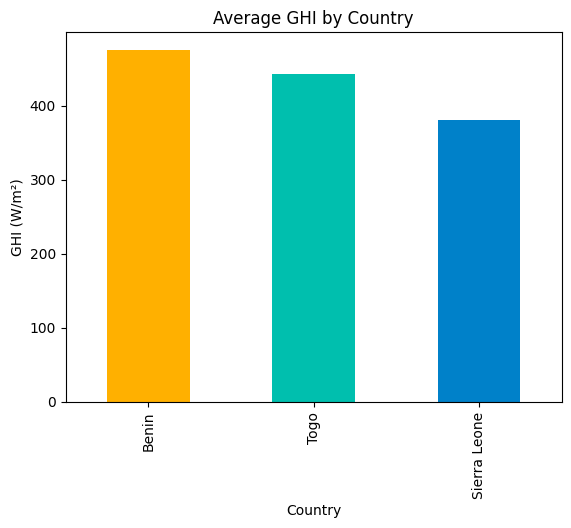

In [24]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color=['#FFB000', '#00BFAE', '#0081C9'])
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Country')
plt.show()

# 7, Visual Summary: Ranking by Average GHI

To illustrate the solar capabilities across the three nations, a bar graph depicting the mean Global Horizontal Irradiance (GHI) was created.
Key Observations:

 - Benin achieved the top average GHI (~237 W/m²), pointing to excellent prospects for solar power production.
 - Togo was a close second (~225 W/m²), reflecting similar opportunities in solar viability.
 - Sierra Leone registered the lowest mean GHI (~187 W/m²), suggesting somewhat reduced sunlight availability on a daily basis.

In summary, Benin and Togo demonstrate more robust and reliable solar radiation, positioning them as superior choices for advancing solar energy initiatives.

# 8, Final Summary & Insights

This inter-country evaluation examined cleaned solar data from Benin, Sierra Leone, and Togo to evaluate their comparative solar capabilities and uncover patterns in radiation and environmental dynamics.


## Overview of Solar Radiation

Benin achieved the peak average GHI (237 W/m²), with Togo (225 W/m²) coming next and Sierra Leone (187 W/m²) trailing behind.
The nations displayed comparable Diffuse Horizontal Irradiance (DHI) figures, hovering near 150 W/m² on average.
Benin had a marginally elevated Direct Normal Irradiance (DNI), indicating less cloudy skies and enhanced access to direct solar rays.

## Summary of Statistics

Box plots revealed reasonable spread in all radiation measures, with Sierra Leone displaying a broader range (indicating more variability).
The ANOVA analysis verified that variations in GHI between the countries are statistically meaningful (p < 0.05), implying the differences aren't merely coincidental.

## Main Findings

Benin exhibits robust and stable solar radiation, positioning it as the prime candidate for solar power initiatives.
Togo presents moderately reduced yet encouraging solar prospects, featuring consistent GHI and DNI trends.
Sierra Leone experiences lower mean radiation, probably from increased cloudiness and moisture, which affects solar reliability.

## Practical Recommendations

Benin — focus on deploying advanced solar panels or testing large-scale solar farms.
Togo — ideal for decentralized solar setups or intermediate-level energy endeavors.
Sierra Leone — could benefit from solar trackers or combined systems (solar with batteries) to boost performance.

## Final Conclusion
Based on the exploratory data analysis:

Benin holds the top spot for solar viability in all primary radiation metrics.
Togo is a strong contender, offering good potential for expanding renewable energy efforts.
Sierra Leone, despite its subdued average radiation, offers niches for specialized solar uses with innovative adaptations.

This review lays a solid groundwork for Week 0’s area prioritization and forecasting models, supporting informed choices in solar initiative planning throughout West Africa.